## Imports

In [1]:
import xpress as xp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
%load_ext line_profiler

In [3]:
%matplotlib widget

In [4]:
xp.controls.outputlog = 1
xp.controls.threads = 1
xp.controls.scaling = 0
xp.controls.presolve = 0
xp.controls.feastol = 1.e-7
xp.controls.optimalitytol = 1.e-7
xp.setOutputEnabled(True)

In [5]:
def retrieve_problem(year,week,output_path,itr=1):
    model = xp.problem()
    model.read(output_path+f"/problem-{year}-{week}--optim-nb-{itr}.mps")
    return(model)

## Accurate shave peaks

In [6]:
study_path = "D:/Users/gerbauxjul/Documents/6-Etudes Antares/4-mingen/failed_remix_hydro"

In [45]:
output_path_initial = study_path+"/output/20250115-1810eco-9_2_log_version_accurate"

In [46]:
initial_level_optim = []
for week in range(1,31):
    m_initial = retrieve_problem(1,week,output_path_initial,itr=2)
    cons = m_initial.getConstraint()
    b = []
    m_initial.getrhs(b, 0, m_initial.attributes.rows - 1)
    idx_area_level=[i for i in range(len(cons)) if "AreaHydroLevel" in cons[i].name]
    initial_level_optim.append(b[idx_area_level[0]]-b[idx_area_level[1]])

Reading Problem Pb Solve
Problem Statistics
         505 (      1 spare) rows
         840 (      0 spare) structural columns
        1847 (    504 spare) non-zero elements
Global Statistics
           0 entities        0 sets        0 set members



Reading Problem Pb Solve
Problem Statistics
         505 (      1 spare) rows
         840 (      0 spare) structural columns
        1847 (    504 spare) non-zero elements
Global Statistics
           0 entities        0 sets        0 set members

Reading Problem Pb Solve
Problem Statistics
         505 (      1 spare) rows
         840 (      0 spare) structural columns
        1847 (    504 spare) non-zero elements
Global Statistics
           0 entities        0 sets        0 set members

Reading Problem Pb Solve
Problem Statistics
         505 (      1 spare) rows
         840 (      0 spare) structural columns
        1847 (    504 spare) non-zero elements
Global Statistics
           0 entities        0 sets        0 set members

Reading Problem Pb Solve
Problem Statistics
         505 (      1 spare) rows
         840 (      0 spare) structural columns
        1847 (    504 spare) non-zero elements
Global Statistics
           0 entities        0 sets        0 set members

Rea

In [47]:
initial_level_optim

[0.0,
 32315.747141729997,
 65587.197934064,
 91124.063804124,
 139163.748595372,
 53496.332640207,
 32115.900672195,
 1318.098543604,
 46023.554792603,
 50249.772552993,
 8652.622193083002,
 48230.65656744,
 54586.439238754996,
 32774.000000001,
 167376.13098568,
 311554.39250052796,
 477652.916305385,
 637270.54457701,
 554666.616682941,
 412934.800620313,
 258075.038359179,
 85575.599854308,
 65681.527368251,
 190739.100540397,
 287611.25430472597,
 422471.818909912,
 559293.973540887,
 480987.67725902697,
 274176.16907234397,
 208777.819729228]

In [48]:
m_initial = retrieve_problem(1,2,output_path_initial,itr=1)

Reading Problem Pb Solve
Problem Statistics
         505 (      1 spare) rows
         840 (      0 spare) structural columns
        1847 (    504 spare) non-zero elements
Global Statistics
           0 entities        0 sets        0 set members



In [49]:
m_initial.write("remix_hydro_itr2.lp","l")

In [50]:
33460.830475063-1145.083333333

32315.747141729997

In [39]:
m_initial.solve()

FICO Xpress v8.14.8, Hyper, solve started 17:25:48, Jan 15, 2025
Heap usage: 574KB (peak 574KB, 638KB system)
Minimizing LP Pb Solve using 1 thread and up to 31GB memory, with these control settings:
SCALING = 0
PRESOLVE = 0
OUTPUTLOG = 1
THREADS = 1
FEASTOL = 1.e-7
OPTIMALITYTOL = 1.e-7
Original problem has:
       505 rows          840 cols         1847 elements

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 1.00e+00,  1.00e+00] / [ 1.00e+00,  1.00e+00]
  RHS and bounds [min,max] : [ 2.46e+02,  1.00e+07] / [ 2.46e+02,  1.00e+07]
  Objective      [min,max] : [ 5.00e-04,  2.00e+04] / [ 5.00e-04,  2.00e+04]

Crash basis containing 113 structural columns created
 
   Its         Obj Value      S   Ninf  Nneg   Sum Dual Inf  Time
     0       -660.940917      D    291     0        .000000     0
   242       406107589.6      D      1     0        .000000     0
Problem is infeasible


In [173]:
m_initial.getObjVal()

48688493.54279115

In [174]:
vars = m_initial.getVariable()
names_ref = [v.name for v in vars]

In [175]:
def create_dataframe_variables(m,names):
    idx = [i for i in range(len(names))]
    vars = m.getVariable()
    df_vars = pd.DataFrame([vars[i] for i in idx], columns=["var"])
    df_vars["names"] = [names[i] for i in idx]
    df_vars["split"] = df_vars["names"].apply(lambda x:x.strip().split("::"))
    df_vars["name_var"] = df_vars["split"].apply(lambda x:x[0])
    df_vars["antares_object"] = df_vars["split"].apply(lambda x:x[1].split("<")[0])
    df_vars["name_antares_object"] = df_vars["split"].apply(lambda x:x[1].split("<")[1].split(">")[0])
    df_vars["subobject"] = df_vars["split"].apply(lambda x:x[2] if len(x)>=4 else "None")
    df_vars["time"] = df_vars["split"].apply(lambda x:int(x[-1].split("<")[1].split(">")[0]))
# coltype = []
# m.getcoltype(coltype, 0, m.attributes.cols - 1)
# df_vars['coltype'] = coltype
    # bounds = []
    # m.getlb(bounds, 0, m.attributes.cols - 1)
    # df_vars['lb'] = [bounds[i] for i in idx]
    # bounds = []
    # m.getub(bounds, 0, m.attributes.cols - 1)
    # df_vars['ub'] = [bounds[i] for i in idx]
    # df_vars = df_vars.assign(sol=[m.getSolution(i) for i in idx])
    # objcoef = []
    # m.getobj(objcoef,0,m.attributes.cols-1)
    # df_vars= df_vars.assign(coeff=[objcoef[i] for i in range(m.attributes.cols)])
    # df_vars = df_vars.assign(sol=[m.getSolution(i) for i in range(m.attributes.cols)])
    return df_vars

In [176]:
df_vars_itr1 = create_dataframe_variables(m_initial,names_ref)

In [177]:
df_vars_itr1["name_var"].unique()

array(['PositiveUnsuppliedEnergy', 'NegativeUnsuppliedEnergy', 'HydProd',
       'HydroLevel', 'Overflow'], dtype=object)

In [178]:
df_vars_itr1[df_vars_itr1["name_var"]=='HydroLevel']

,var,names,split,name_var,antares_object,name_antares_object,subobject,time
3,HydroLevel::area<a-5>::hour<0>,HydroLevel::area<a-5>::hour<0>,"[HydroLevel, area<a-5>, hour<0>]",HydroLevel,area,a-5,None,0
8,HydroLevel::area<a-5>::hour<1>,HydroLevel::area<a-5>::hour<1>,"[HydroLevel, area<a-5>, hour<1>]",HydroLevel,area,a-5,None,1
13,HydroLevel::area<a-5>::hour<2>,HydroLevel::area<a-5>::hour<2>,"[HydroLevel, area<a-5>, hour<2>]",HydroLevel,area,a-5,None,2
18,HydroLevel::area<a-5>::hour<3>,HydroLevel::area<a-5>::hour<3>,"[HydroLevel, area<a-5>, hour<3>]",HydroLevel,area,a-5,None,3
23,HydroLevel::area<a-5>::hour<4>,HydroLevel::area<a-5>::hour<4>,"[HydroLevel, area<a-5>, hour<4>]",HydroLevel,area,a-5,None,4
...,...,...,...,...,...,...,...,...
818,HydroLevel::area<a-5>::hour<163>,HydroLevel::area<a-5>::hour<163>,"[HydroLevel, area<a-5>, hour<163>]",HydroLevel,area,a-5,None,163
823,HydroLevel::area<a-5>::hour<164>,HydroLevel::area<a-5>::hour<164>,"[HydroLevel, area<a-5>, hour<164>]",HydroLevel,area,a-5,None,164
828,HydroLevel::area<a-5>::hour<165>,HydroLevel::area<a-5>::hour<165>,"[HydroLevel, area<a-5>, hour<165>]",HydroLevel,area,a-5,None,165
833,HydroLevel::area<a-5>::hour<166>,HydroLevel::area<a-5>::hour<166>,"[HydroLevel, area<a-5>, hour<166>]",HydroLevel,area,a-5,None,166


In [179]:
sol_prod = np.array([m_initial.getSolution(i) for i in df_vars_itr1[df_vars_itr1["name_var"]=='HydProd'].index])
sol_ovfl = np.array([m_initial.getSolution(i) for i in df_vars_itr1[df_vars_itr1["name_var"]=='Overflow'].index])

In [180]:
sol_level = np.array([m_initial.getSolution(i) for i in df_vars_itr1[df_vars_itr1["name_var"]=='HydroLevel'].index])

In [181]:
initial_level = 10103.705526416-1451.083333333
print(initial_level)

8652.622193083002


In [20]:
cons = m_initial.getConstraint()

In [21]:
b = []
m_initial.getrhs(b, 0, m_initial.attributes.rows - 1)

In [22]:
idx_area_level=[i for i in range(len(cons)) if "AreaHydroLevel" in cons[i].name]
print(len(idx_area_level))

168


In [23]:
# inflow = np.array([1451]*168)
inflow = [b[i] for i in idx_area_level]

In [186]:
recompute_level = np.cumsum(inflow)-np.cumsum(sol_prod)-np.cumsum(sol_ovfl) #+ initial_level

In [187]:
np.max(np.abs(recompute_level-sol_level))

4.94765117764473e-10

In [188]:
sol_prod

array([3900.,  605.,  194.,    0.,    0., 3532., 1898.,    0.,    0.,
          0.,    0.,  102.,    0.,    0.,    0.,  840.,    0., 1063.,
       3660.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        737.,  195., 2075.,    0.,    0.,    0.,    0.,    0.,  868.,
          0.,    0.,    0.,    0.,    0.,    0.,  640.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0., 2271., 4785.,
          0.,    0.,   18.,    0.,    0., 2692.,    0.,    0.,    0.,
          0.,    0.,    0., 1785.,    0.,    0.,    0.,    0.,    0.,
        435., 5075.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0., 1332., 1271.,    0.,    0.,  421.,    0.,
          0.,    0.,    0.,    0., 7287.,    0.,    0.,    0.,   71.,
          0.,  123.,    0.,    0., 1447.,  413.,    0.,    0.,  799.,
       6407., 1773.,

In [189]:
sol_ovfl

array([   0.        , 1451.08333333, 1451.08333333,    0.        ,
       1451.08333333,    0.        ,    0.        ,    0.        ,
          0.        , 1451.08333333,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
       1451.08333333,    0.        ,    0.        , 1451.08333333,
          0.        ,    0.        ,    0.        , 1451.125     ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
       1451.125     , 1451.125     , 1451.125     ,    0.        ,
          0.        , 1451.125     , 1451.125     , 1451.125     ,
       1451.125     , 1451.125     , 1451.125     , 1451.125     ,
       1451.08333333, 1451.08333333, 1451.08333333, 1451.08333333,
       1451.08333333, 1451.08333333,    0.        , 1451.08333333,
       1451.08333333, 1451.08333333,    0.        , 1451.08333

In [190]:
sol_level

array([ 6203.70552642,  5598.70552642,  5404.70552642,  6855.78885975,
        6855.78885975,  4774.87219308,  4327.95552642,  5779.03885975,
        7230.12219308,  7230.12219308,  8681.20552641, 10030.28885975,
       11481.37219308, 12932.45552641, 14383.53885975, 14994.62219308,
       16445.70552641, 16833.78885975, 14624.87219308, 16075.95552641,
       16075.95552641, 17527.03885974, 18978.12219308, 18978.12219308,
       20429.24719308, 21880.37219308, 23331.49719308, 23331.49719308,
       24782.62219308, 26233.74719308, 27684.87219308, 29135.99719308,
       30587.12219308, 32038.24719308, 33489.37219308, 34940.49719308,
       34203.49719308, 34008.49719308, 31933.49719308, 33384.62219308,
       34835.74719308, 34835.74719308, 34835.74719308, 34835.74719308,
       33967.74719308, 33967.74719308, 33967.74719308, 33967.74719308,
       33967.74719308, 33967.74719308, 33967.74719308, 33327.74719308,
       33327.74719308, 33327.74719308, 34778.83052641, 34778.83052641,
      

In [191]:
recompute_level[recompute_level<=0]

array([], dtype=float64)

In [192]:
recompute_level[recompute_level>=1e7]

array([], dtype=float64)

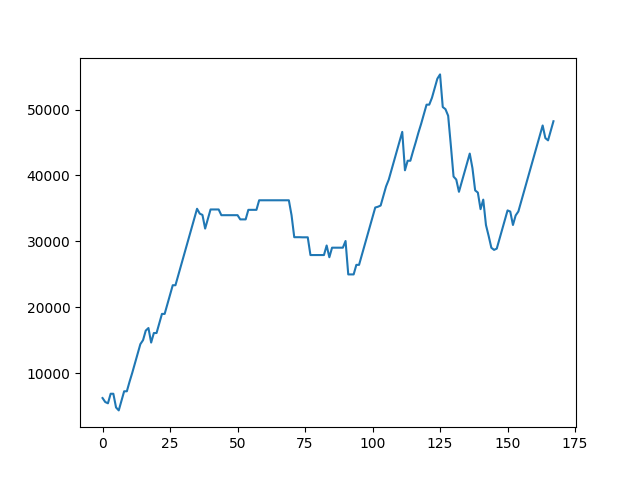

In [193]:
plt.figure()
plt.plot(sol_level)
# plt.plot([1e7]*168)
plt.show()

In [194]:
sol_level[sol_level<0]

array([], dtype=float64)

In [195]:
sol_level[sol_level>1e7]

array([], dtype=float64)

In [196]:
with open(output_path_initial+"/optimal-values-1-11--optim-nb-2.txt","r") as file : 
    optimal_values = file.readlines()

In [197]:
df_optimal = pd.DataFrame([l.strip().split("\t") for l in optimal_values],columns=["Name","Value"])
df_optimal["Value"] = df_optimal["Value"].apply(lambda x:float(x))
df_optimal["Var"] = df_optimal["Name"].apply(lambda x:x.split("::")[0])
df_optimal["Hour"] = df_optimal["Name"].apply(lambda x:int(x.split("::hour<")[1][:-1]))


In [198]:
df_optimal

,Name,Value,Var,Hour
0,PositiveUnsuppliedEnergy::area<a-5>::hour<1680>,0.000000,PositiveUnsuppliedEnergy,1680
1,NegativeUnsuppliedEnergy::area<a-5>::hour<1680>,0.000000,NegativeUnsuppliedEnergy,1680
2,HydProd::area<a-5>::hour<1680>,3900.000000,HydProd,1680
3,HydroLevel::area<a-5>::hour<1680>,4752.622193,HydroLevel,1680
4,Overflow::area<a-5>::hour<1680>,1451.083333,Overflow,1680
...,...,...,...,...
835,PositiveUnsuppliedEnergy::area<a-5>::hour<1847>,0.000000,PositiveUnsuppliedEnergy,1847
836,NegativeUnsuppliedEnergy::area<a-5>::hour<1847>,8947.000000,NegativeUnsuppliedEnergy,1847
837,HydProd::area<a-5>::hour<1847>,0.000000,HydProd,1847
838,HydroLevel::area<a-5>::hour<1847>,48230.656567,HydroLevel,1847


In [199]:
optimal_level = df_optimal.loc[df_optimal.Var=="HydroLevel","Value"].values

In [200]:
optimal_level[optimal_level<0]

array([], dtype=float64)

In [201]:
optimal_level[optimal_level>1e7]

array([], dtype=float64)

In [203]:
imports = np.loadtxt(output_path_initial+"/ts-generator/hydro/mc-/a-5/storage.txt")

In [202]:
10000/24

416.6666666666667

In [206]:
# inflow = np.array([10000/24]*168)
# inflow = [b[i] for i in idx_area_level]
inflow = np.array([b[i] for i in idx_area_level])

In [214]:
np.round(np.round(np.array([b[i] for i in idx_area_level[24::24]])*24)/24)

array([1451., 1451., 1451., 1451., 1451., 1451.])

In [164]:
recompute_level = np.cumsum(inflow)-np.cumsum(df_optimal.loc[df_optimal.Var=="HydProd","Value"].values)-np.cumsum(df_optimal.loc[df_optimal.Var=="Overflow","Value"].values) + initial_level

In [165]:
np.max(np.abs(recompute_level-optimal_level))

16.999998266364855

In [166]:
recompute_level[recompute_level<=0]

array([-3.87499937, -3.99999937, -4.12499937, -4.24999937, -4.37499937,
       -4.49999937, -4.62499937, -4.74999937, -4.87499937, -5.33333257,
       -5.41666587, -5.49999917, -5.58333247])

In [167]:
recompute_level[recompute_level>=1e7]

array([], dtype=float64)